In [1]:
import sys
import os
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", "..", ".."))
sys.path.append(os.path.join(os.getcwd(), "..", ".."))
sys.path

['/home/blessyantony/miniconda3/envs/zoonosis/lib/python311.zip',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/lib-dynload',
 '',
 '/home/blessyantony/miniconda3/envs/zoonosis/lib/python3.11/site-packages',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../../..',
 '/home/blessyantony/dev/git/zoonosis/src/jupyter_notebooks/results-analysis/coronaviridae/../..']

In [2]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

from src.utils import utils, evaluation_utils, visualization_utils
from sklearn.metrics import auc, precision_recall_curve
from statistics import mean
from datetime import datetime

In [3]:
# file_paths = {
#     "msl128vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240824/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl128vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240825/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl256vs30_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
#     "msl256vs30cls_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240808/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv")
# }
id_col = "accession_id"
file_paths = {
    #"msl128vs30_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128ae_bn_vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"msl128vs30cls_ae_bn_s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl128ae_bn_vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"ProtienBert": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_uniprot_embl_vertebrates_t0.01_c8/20240902/host_multi/proteinbert/uniprot_cov_s_prot_embl_hosts/sarscov2_variants_s_prediction_results_20240902_224534.csv"),
    "ProstT5": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniprot/external/prostt5_lr1e-4.csv"),
    #"ESM2-35M": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniprot/external/esm2_t12_35M_UR50D_lr1e-4.csv"),
    #"ESM2-650M": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniprot/external/esm2_t33_650M_UR50D_lr1e-4.csv"),
    "ESM2-3B": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniprot/external/esm2_t36_3B_UR50D_lr1e-4.csv"),
    # "ESM3": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20241205/sars-cov-2/unirprot/esm3/esm3_lr1e-4_tl_tf_multi_sarscov2_variants_s.csv"),
    #"ProtienBert-2048": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_uniprot_embl_vertebrates_t0.01_c8/20240902/host_multi/proteinbert/uniprot_cov_s_prot_embl_hosts/sarscov2_variants_s_prediction_results_20240903_132845.csv"),
    #"VirProBert-msl1366": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240903/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_msl1366/tl_tf_multi_sarscov2_variants_s.csv"),
    #"Hybd-sl256s64_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_perturbation/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    #"Hybd-sl256s64_CLS_UA": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/coronaviridae_s_prot_variants/20240829/sars-cov-2/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-4/msl256ae_bn_vs30cls_s64/tl_tf_multi_sarscov2_variants_s.csv"),
    "VirProBERT": os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniprot/cov-S-multi-transfer_learning_mlm_hybrid_attn_fnn_2l_lr1e-5/msl256ae_bn_vs30cls_s64.csv")
}

In [4]:
dfs = []
for k, v in file_paths.items():
    df = pd.read_csv(v)
    df["model"] = k
    index_seq_pred = df[df[id_col] == "YP_009724390.1"]["Human"].values[0]
    df["Human_pred_diff"] = df["Human"] - index_seq_pred
    dfs.append(df)
df = pd.concat(dfs)
df

,accession_id,Cat,Cattle,Chicken,Dromedary camel,Gray wolf,Human,Pig,Yak,y_true,pangolin_lineage,geo_location,seq_length,model,Human_pred_diff
0,XDF26040.1,0.138331,0.004630,0.006065,0.007839,0.006210,0.790498,0.041824,0.004603,Human,P.2,"Brazil: Sao Paulo, Sao Jose do Rio Preto",1273,ProstT5,0.035618
1,QWS77957.1,0.116513,0.007913,0.008512,0.008977,0.008217,0.807338,0.034953,0.007576,Human,B.1.351,Djibouti: Camp Lemonnier,1270,ProstT5,0.052457
2,WAQ41987.1,0.116710,0.004336,0.005245,0.007532,0.007281,0.795716,0.058442,0.004739,Human,B.1.525,Nigeria,1270,ProstT5,0.040835
3,UOU27349.1,0.000386,0.000006,0.002123,0.993543,0.000004,0.003882,0.000051,0.000004,Human,BA.1,USA,1270,ProstT5,-0.750998
4,QVU88956.1,0.174857,0.010891,0.017584,0.011195,0.008215,0.732949,0.035075,0.009234,Human,B.1.617.1,USA: Texas,1273,ProstT5,-0.021931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1521,WXI08799.1,0.021112,0.003668,0.010617,0.060312,0.007179,0.894049,0.000267,0.002796,Human,B.1.351,South Africa,1270,VirProBERT,0.180128
1522,QZQ19221.1,0.050915,0.012736,0.030470,0.104493,0.025058,0.767329,0.000952,0.008047,Human,B.1.617.2,USA: Florida,1271,VirProBERT,0.053407
1523,QTW45426.1,0.130555,0.013203,0.009489,0.097270,0.036443,0.695987,0.000736,0.016317,Human,B.1.617.1,USA: California,1273,VirProBERT,-0.017935
1524,WAQ41987.1,0.055928,0.004729,0.017356,0.099240,0.008271,0.809881,0.001030,0.003565,Human,B.1.525,Nigeria,1270,VirProBERT,0.095960


##### Process ESM3 separately because it was executed using the pertubation analysis pipeline and not the sarscov2 variant pipeline.

In [5]:
esm3_df = pd.read_csv(os.path.join(os.getcwd(), "..","..", "..", "..", "output/raw/sarscov2_s_prot_variants/20250123/uniprot/external/esm3_lr1e-4.csv"))
esm3_df["model"] = "ESM3"
esm3_df

,Cat,Cattle,Chicken,Dromedary camel,Gray wolf,Human,Pig,Yak,accession_id,y_true,model
0,0.018273,1.248458e-02,0.015702,0.073054,0.012957,8.479719e-01,2.371966e-04,1.931945e-02,WXI23238.1,Human,ESM3
1,0.016629,5.660674e-03,0.008414,0.061143,0.005481,8.936566e-01,3.846854e-04,8.631428e-03,WDZ07514.1,Human,ESM3
2,0.995685,1.054746e-09,0.000041,0.004246,0.000028,1.381537e-10,9.004865e-19,3.200666e-14,UIO23657.1,Human,ESM3
3,0.067908,2.292623e-02,0.010346,0.016439,0.021093,8.402418e-01,3.755041e-04,2.067028e-02,QWF06238.1,Human,ESM3
4,0.122672,2.545880e-03,0.002817,0.010513,0.015275,8.429275e-01,2.907419e-04,2.959201e-03,QVR41809.1,Human,ESM3
...,...,...,...,...,...,...,...,...,...,...,...
1521,0.104137,3.078895e-03,0.002489,0.002649,0.012946,8.692987e-01,7.077998e-05,5.330607e-03,UIS64943.1,Human,ESM3
1522,0.003728,2.702590e-03,0.003195,0.039658,0.000892,9.467275e-01,2.714764e-05,3.069590e-03,UFD48954.1,Human,ESM3
1523,0.107549,4.318790e-03,0.003347,0.017131,0.014125,8.487529e-01,7.984560e-04,3.978237e-03,QTP73241.1,Human,ESM3
1524,0.104699,3.398604e-03,0.001898,0.002686,0.015006,8.674313e-01,8.106363e-05,4.799393e-03,UOQ24357.1,Human,ESM3


In [6]:
# get the mapping between accession ids and the pangolin lineage
accession_id_pangolin_lineage_map = df[df["model"] == "VirProBERT"][["accession_id", "pangolin_lineage"]].set_index("accession_id").to_dict()["pangolin_lineage"]
accession_id_pangolin_lineage_map

{'URA90455.1': 'P.1',
 'QXI94978.1': 'C.37',
 'ULR62690.1': 'BA.1',
 'QUS82344.1': 'P.2',
 'QWE61652.1': 'P.1',
 'WEU88240.1': 'P.2',
 'UBG65496.1': 'B.1.617.1',
 'UCP71075.1': 'P.1',
 'ULA38211.1': 'B.1.617.1',
 'UJU91429.1': 'B.1.427',
 'UNJ27550.1': 'P.1',
 'WKN90594.1': 'B.1.1.7',
 'UBE73951.1': 'B.1.621',
 'UBC58653.1': 'B.1.525',
 'ULF07941.1': 'B.1.351',
 'WEU91979.1': 'P.2',
 'QVW59582.1': 'B.1.429',
 'ULF05680.1': 'B.1.351',
 'QXL79722.1': 'B.1.621',
 'UML18009.1': 'P.2',
 'UEO57783.1': 'P.2',
 'QVX56929.1': 'B.1.526',
 'UDB08238.1': 'P.1',
 'UEY07760.1': 'B.1.617.2',
 'ULB88857.1': 'B.1.1.529',
 'QZK79290.1': 'B.1.351',
 'UPH92132.1': 'BA.1',
 'QTZ24355.1': 'B.1.351',
 'UBC11484.1': 'B.1.621',
 'QYM89214.1': 'B.1.617.1',
 'QYM89180.1': 'B.1.617.1',
 'QVL63864.1': 'P.2',
 'QSH71989.1': 'B.1.427',
 'QUQ50990.1': 'B.1.525',
 'UUB70195.1': 'B.1.1.529',
 'UEF66628.1': 'B.1.429',
 'QWA53953.1': 'B.1.617.1',
 'QJD07640.1': 'B',
 'QWB15172.1': 'B.1.617.2',
 'QSN76221.1': 'B.1.427',
 

In [7]:
esm3_df["pangolin_lineage"] = esm3_df.apply(lambda x: accession_id_pangolin_lineage_map[x["accession_id"]], axis=1)
esm3_df.shape

(1526, 12)

In [8]:
df = pd.concat([df, esm3_df])

In [9]:
df["model"].value_counts()

model
ProstT5       1526
ESM2-3B       1526
VirProBERT    1526
ESM3          1526
Name: count, dtype: int64

In [10]:
order = list(df["pangolin_lineage"].sort_values().unique())
order.remove("B")
order = ["B"] + order
order

['B',
 'B.1.1.529',
 'B.1.1.7',
 'B.1.351',
 'B.1.427',
 'B.1.429',
 'B.1.525',
 'B.1.526',
 'B.1.617.1',
 'B.1.617.2',
 'B.1.621',
 'BA.1',
 'C.37',
 'P.1',
 'P.2',
 'P.3']

In [11]:
models = list(df["model"].unique())
models = ['ProstT5', 'ESM2-3B', 'ESM3', 'VirProBERT']
models

['ProstT5', 'ESM2-3B', 'ESM3', 'VirProBERT']

In [12]:
who_designation_df = pd.read_csv(os.path.join(os.getcwd(), "..","..", "..", "..", "input/data/coronaviridae/20240313/sarscov2/sarscov2_who_designated_voc.csv"))
who_designation_df

,pango_lineage,who_variant,designation,first_designation_date,location
0,B,Wuhan-Hu-1,Index,12/01/2019,China
1,B.1.1.7,Alpha,VOC,12/08/2020,United Kingdom
2,B.1.351,Beta,VOC,12/18/2020,South Africa
3,P.1,Gamma,VOC,1/11/2021,Brazil
4,B.1.617.2,Delta,VOC,5/11/2021,India
5,B.1.427,Epsilon,VOI,3/5/2021,USA
6,B.1.429,Epsilon,VOI,3/5/2021,USA
7,P.2,Zeta,VOI,3/17/2021,Brazil
8,B.1.525,Eta,VOI,3/17/2021,Nigeria
9,P.3,Theta,VOI,3/24/2021,Philippines


In [13]:
who_designation_df["pango_who_annotation"] = who_designation_df["pango_lineage"] + " (" + who_designation_df["who_variant"] + ")" 
variant_order = who_designation_df["pango_who_annotation"].unique()
variant_order

array(['B (Wuhan-Hu-1)', 'B.1.1.7 (Alpha)', 'B.1.351 (Beta)',
       'P.1 (Gamma)', 'B.1.617.2 (Delta)', 'B.1.427 (Epsilon)',
       'B.1.429 (Epsilon)', 'P.2 (Zeta)', 'B.1.525 (Eta)', 'P.3 (Theta)',
       'B.1.526 (Iota)', 'B.1.617.1 (Kappa)', 'C.37 (Lambda)',
       'B.1.621 (Mu)', 'B.1.1.529 (Omicron)', 'BA.1 (Omicron)'],
      dtype=object)

In [14]:
who_designation_df.rename(columns={"pango_lineage": "pangolin_lineage"}, inplace=True)

In [15]:
df = pd.merge(df, who_designation_df, how="inner", on="pangolin_lineage")

In [16]:
df

,accession_id,Cat,Cattle,Chicken,Dromedary camel,Gray wolf,Human,Pig,Yak,y_true,pangolin_lineage,geo_location,seq_length,model,Human_pred_diff,who_variant,designation,first_designation_date,location,pango_who_annotation
0,XDF26040.1,0.138331,0.004630,0.006065,0.007839,0.006210,0.790498,0.041824,0.004603,Human,P.2,"Brazil: Sao Paulo, Sao Jose do Rio Preto",1273.0,ProstT5,0.035618,Zeta,VOI,3/17/2021,Brazil,P.2 (Zeta)
1,QWS77957.1,0.116513,0.007913,0.008512,0.008977,0.008217,0.807338,0.034953,0.007576,Human,B.1.351,Djibouti: Camp Lemonnier,1270.0,ProstT5,0.052457,Beta,VOC,12/18/2020,South Africa,B.1.351 (Beta)
2,WAQ41987.1,0.116710,0.004336,0.005245,0.007532,0.007281,0.795716,0.058442,0.004739,Human,B.1.525,Nigeria,1270.0,ProstT5,0.040835,Eta,VOI,3/17/2021,Nigeria,B.1.525 (Eta)
3,UOU27349.1,0.000386,0.000006,0.002123,0.993543,0.000004,0.003882,0.000051,0.000004,Human,BA.1,USA,1270.0,ProstT5,-0.750998,Omicron,VOC,11/26/2021,South Africa,BA.1 (Omicron)
4,QVU88956.1,0.174857,0.010891,0.017584,0.011195,0.008215,0.732949,0.035075,0.009234,Human,B.1.617.1,USA: Texas,1273.0,ProstT5,-0.021931,Kappa,VOI,4/4/2021,India,B.1.617.1 (Kappa)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6099,UIS64943.1,0.104137,0.003079,0.002489,0.002649,0.012946,0.869299,0.000071,0.005331,Human,B.1.1.529,NaN,NaN,ESM3,NaN,Omicron,VOC,11/26/2021,South Africa,B.1.1.529 (Omicron)
6100,UFD48954.1,0.003728,0.002703,0.003195,0.039658,0.000892,0.946728,0.000027,0.003070,Human,B.1.617.2,NaN,NaN,ESM3,NaN,Delta,VOC,5/11/2021,India,B.1.617.2 (Delta)
6101,QTP73241.1,0.107549,0.004319,0.003347,0.017131,0.014125,0.848753,0.000798,0.003978,Human,B.1.427,NaN,NaN,ESM3,NaN,Epsilon,VOI,3/5/2021,USA,B.1.427 (Epsilon)
6102,UOQ24357.1,0.104699,0.003399,0.001898,0.002686,0.015006,0.867431,0.000081,0.004799,Human,B.1.1.529,NaN,NaN,ESM3,NaN,Omicron,VOC,11/26/2021,South Africa,B.1.1.529 (Omicron)


In [17]:
def get_annotation(x):
    mean_val = np.mean(x)
    std_val = np.std(x)
    return "{:.2f}".format(mean_val) + "\n" + u"\u00B1" + "{:.2f}".format(std_val)
    
def get_annotation_df(heatmap_df, model_df):
    annot_df = pd.DataFrame(0, index=heatmap_df.index, columns=heatmap_df.columns)
    annot_idx = heatmap_df.idxmax(axis=1).reset_index()
    mean_std_df = model_df.groupby("pango_who_annotation").agg(lambda x: get_annotation(x))
    for item in annot_idx.values:
        annot_df.loc[item[0], item[1]] = mean_std_df.loc[item[0], item[1]]
        annot_df.loc[item[0], "Human"] = mean_std_df.loc[item[0], "Human"]
    annot_df = annot_df.astype(str)
    annot_df[annot_df == "0"] = ""
    return annot_df

model = (1526, 8)
model = (1526, 8)


/tmp/ipykernel_3467908/3754021456.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.89
±0.09' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  annot_df.loc[item[0], item[1]] = mean_std_df.loc[item[0], item[1]]
/tmp/ipykernel_3467908/3754021456.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.86
±0.10' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  annot_df.loc[item[0], item[1]] = mean_std_df.loc[item[0], item[1]]


model = (1526, 8)


/tmp/ipykernel_3467908/3754021456.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.61
±0.35' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  annot_df.loc[item[0], item[1]] = mean_std_df.loc[item[0], item[1]]


model = (1526, 8)


/tmp/ipykernel_3467908/3754021456.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.85
±0.08' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  annot_df.loc[item[0], item[1]] = mean_std_df.loc[item[0], item[1]]


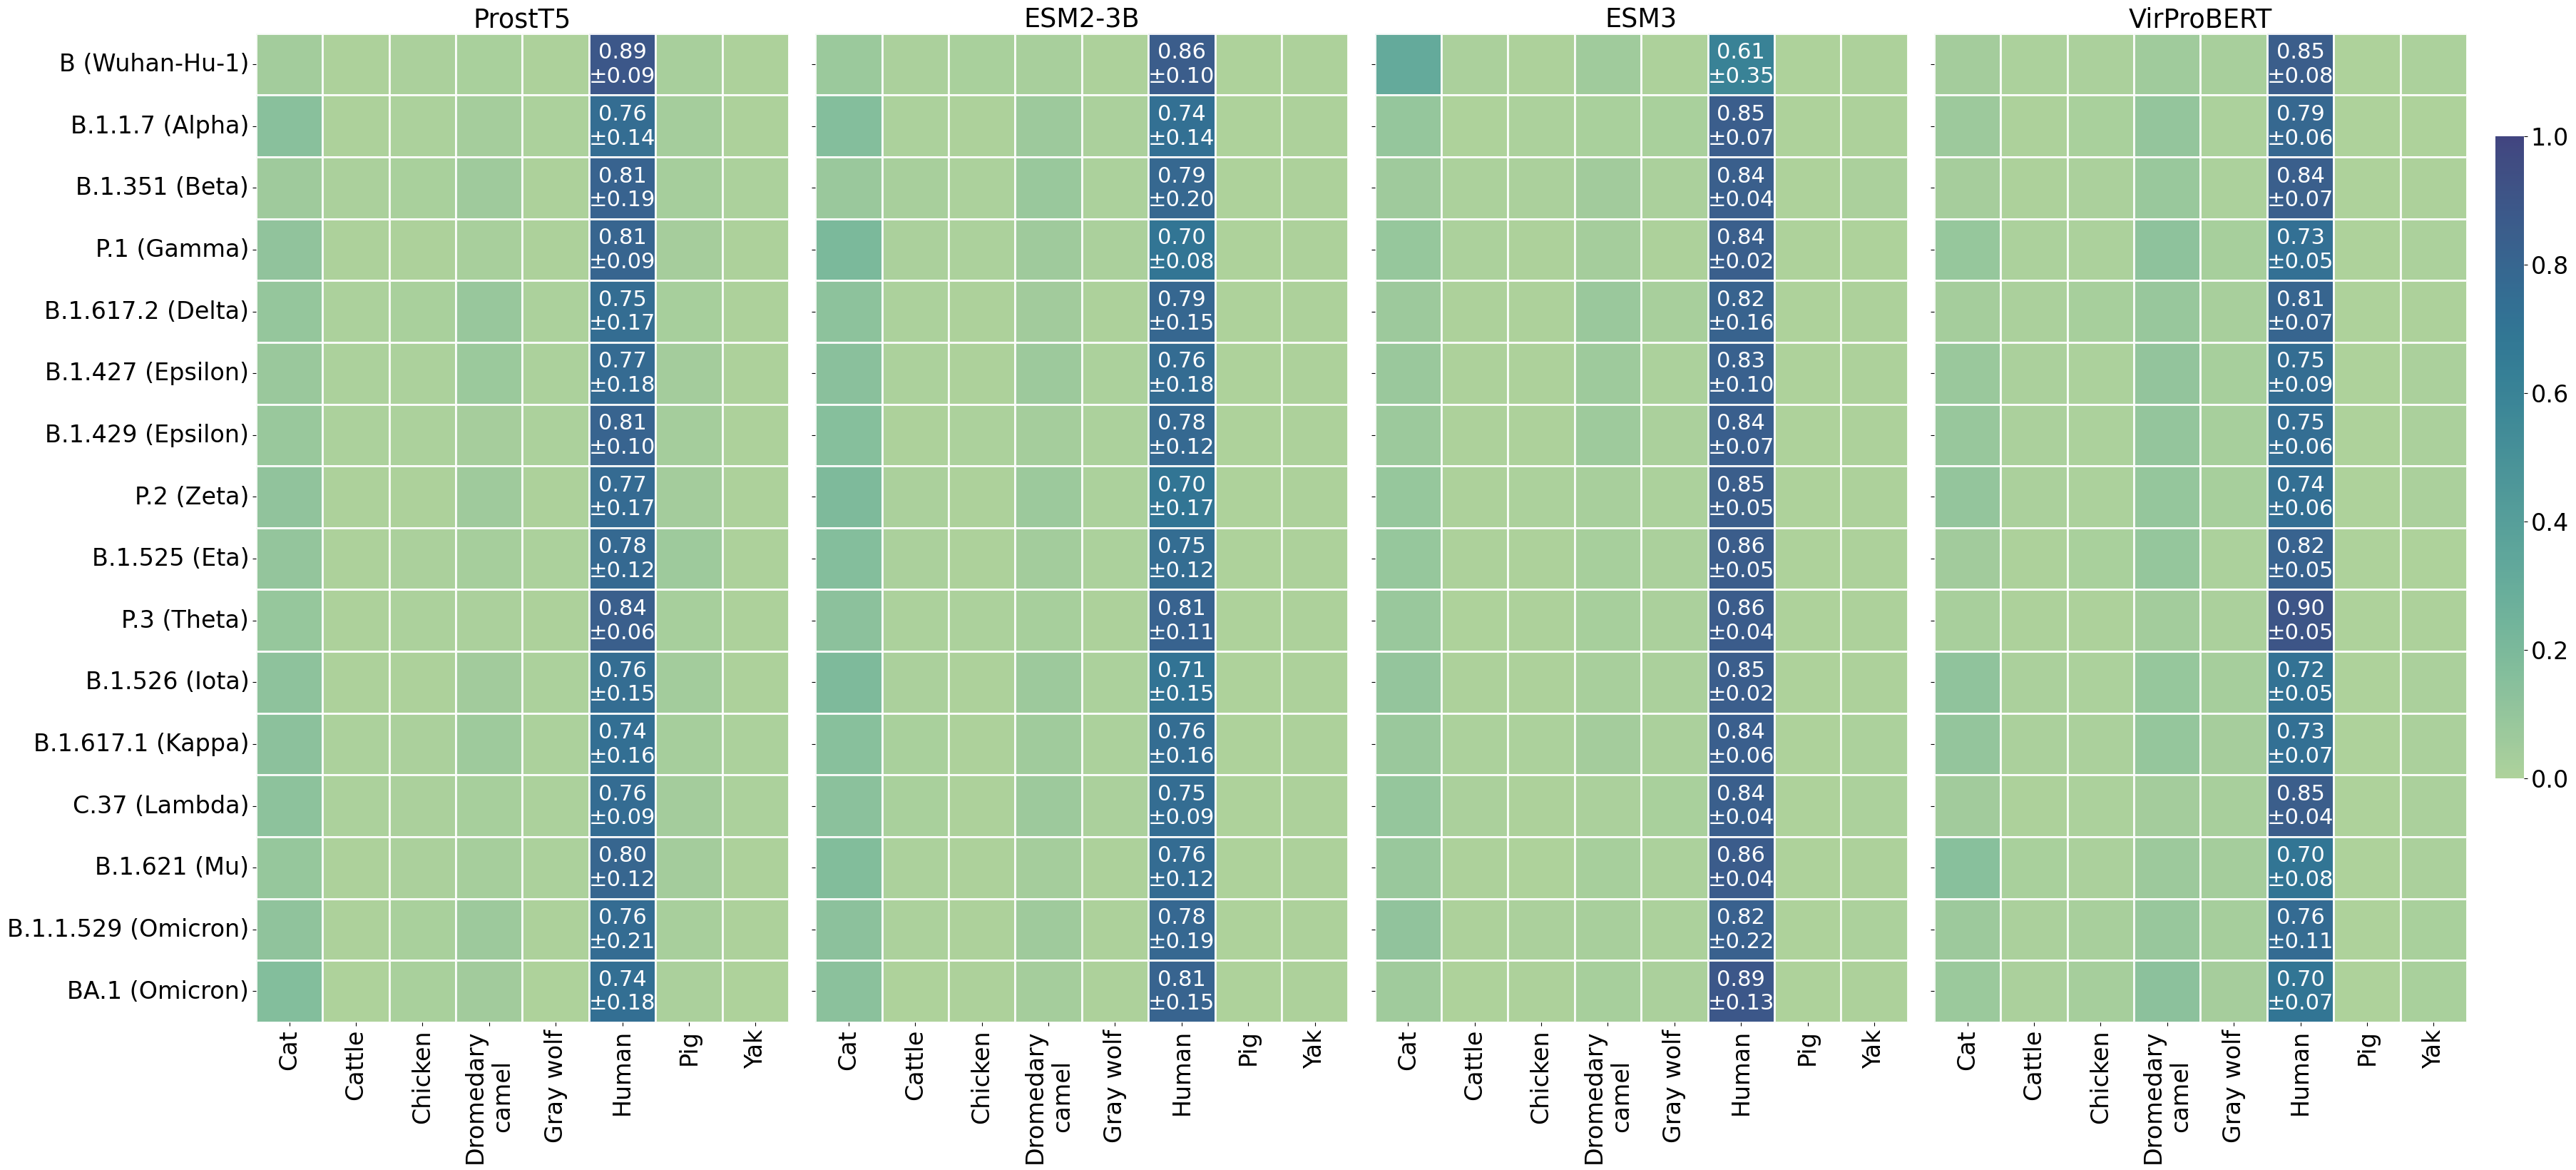

In [22]:
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams.update({'font.size': 22})
fig, axs = plt.subplots(1, 4, figsize=(40, 18), sharex=False, sharey=True)

cbar_ax = fig.add_axes([.91, .3, .01, .5])
for i, model in enumerate(models):
    model_df = df[df["model"] == model][["Cat", "Cattle", "Chicken", "Dromedary camel", "Gray wolf", "Human", "Pig", "Yak", "pango_who_annotation"]].set_index("pango_who_annotation")
    print(f"model = {model_df.shape}")
    heatmap_df = model_df.groupby("pango_who_annotation").agg("mean").reindex(variant_order)
    model_df.rename(columns={"Dromedary camel": "Dromedary\ncamel"}, inplace=True)
    heatmap_df.rename(columns={"Dromedary camel": "Dromedary\ncamel"}, inplace=True)
    sns.heatmap(heatmap_df, ax=axs[i], linewidth=2,
                annot=get_annotation_df(heatmap_df, model_df), fmt="",
                vmin=0, vmax=1,
                cbar=i == 0, 
                cbar_ax=None if i != 0 else cbar_ax,
                cmap="crest", alpha=.9)
    axs[i].set_title(model)
    axs[i].set(xlabel="", ylabel="")
plt.subplots_adjust(wspace=0.05)
plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", f"output/visualization/temp_new/sarscov2_variants_uniprot.pdf"), bbox_inches="tight")
plt.show()